# Task 1 : EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
import re
import nltk
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

# Reading Dataset

In [3]:
#data was not able to read that's why I imported chardet
import chardet
with open("spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [4]:
df = pd.read_csv("spam.csv",encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


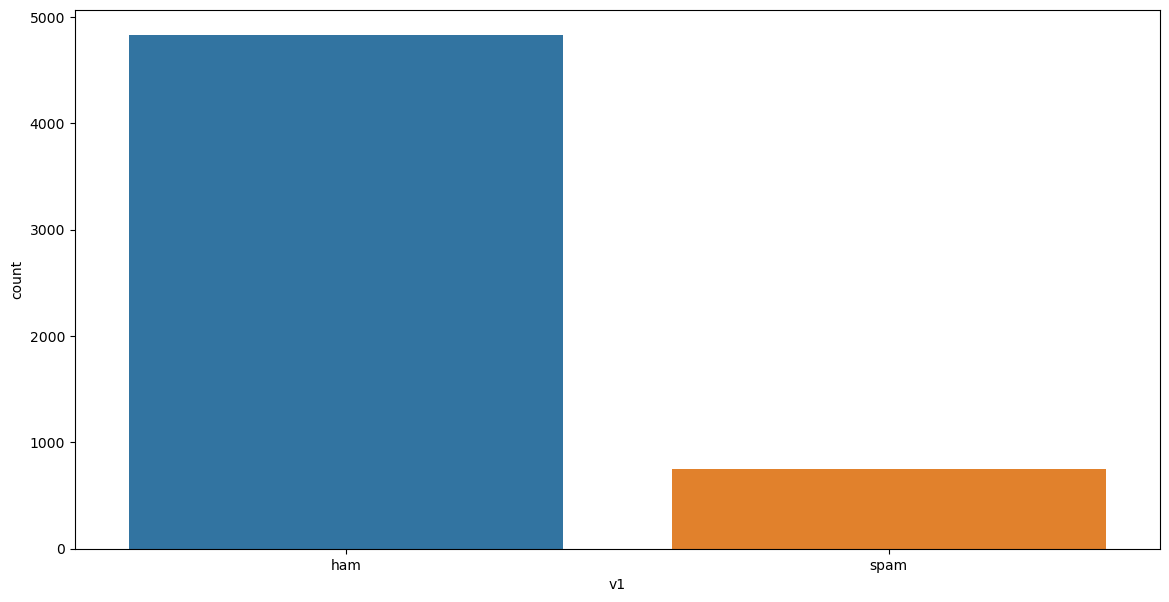

In [7]:
plt.figure(figsize=(14, 7))
sns.countplot(df.v1)
plt.show() 

# Data Preprocessing

In [8]:
stemmer = nltk.stem.PorterStemmer()
clean_df = []
for i in range(len(df)):
    temp = re.sub('[^a-zA-Z]', ' ', df["v2"][i]) # Removing Special words
    temp = temp.lower()
    temp = temp.split()
    temp = ' '.join(temp)
    clean_df.append(temp)

In [9]:
clean_df[:5]

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s',
 'u dun say so early hor u c already then say',
 'nah i don t think he goes to usf he lives around here though']

# Feature Engineering

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv = CountVectorizer(max_features=5000)

In [12]:
x = cv.fit_transform(clean_df).toarray()

In [13]:
x[:50]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
#Encoding V1 column data
def encoder(x):
    if x=='ham':
        return 0
    else:
        return 1

y = list(map(encoder, df["v1"]))

# Preparing Model

In [15]:
# Spliting into train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [16]:
# Fitting Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
result_table = confusion_matrix(y_test, y_pred)
print(result_table)

[[1189   12]
 [   9  183]]


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1201
           1       0.94      0.95      0.95       192

    accuracy                           0.98      1393
   macro avg       0.97      0.97      0.97      1393
weighted avg       0.99      0.98      0.98      1393



In [20]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("Accuracy of the Model is ",round(score*100, 2), "%")

Accuracy of the Model is  98.49 %


## Accuracy of the model is 98.49%.